# Working with complicated dataset

Your name: Benjamin Khor

### Question 1

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [32]:
import numpy as np
import matplotlib.pyplot as plt

columns = ['query acc.ver', 'subject acc.ver', '% identity', 'alignment length',
           'mismatches', 'gap opens', 'q. start', 'q. end', 's. start', 's. end',
           'evalue', 'bit score', '% positives', 'bonds', 'publications']

df = pd.read_csv('https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv',
                 comment="#",
                 skiprows=6,
                 names=columns,
                 usecols=columns,
                 engine='python',
                 na_values=['-'],
                 thousands=',',
                )
df.drop('query acc.ver', axis=1, inplace=True)
df.set_index('subject acc.ver', inplace=True)
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, NP_904328.1 to AGS12808.1
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   % identity        100 non-null    float64
 1   alignment length  100 non-null    int64  
 2   mismatches        100 non-null    int64  
 3   gap opens         100 non-null    int64  
 4   q. start          100 non-null    int64  
 5   q. end            100 non-null    int64  
 6   s. start          100 non-null    int64  
 7   s. end            100 non-null    int64  
 8   evalue            100 non-null    int64  
 9   bit score         100 non-null    int64  
 10  % positives       100 non-null    float64
 11  bonds             100 non-null    int64  
 12  publications      97 non-null     float64
dtypes: float64(3), int64(10)
memory usage: 10.9+ KB


,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications
subject acc.ver,,,,,,,,,,,,,
NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,1487,9.0
AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,17947,47.0
YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,12106,13.0
ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,2319,41.0
AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,18964,3.0


### Question 2
What is the average number of publications?

In [33]:
df.publications.mean()

26.989690721649485

### Question 3
List the `subject acc.ver` that has over 15,000 bonds.

In [34]:
df[df.bonds > 15000].index.tolist()

['AGK29621.1',
 'AHG32084.1',
 '6G2J_H',
 'YP_002791042.1',
 'AGK29634.1',
 '0806162F',
 'YP_009112408.1',
 'YP_001876469.1',
 'YP_009092269.1',
 'AHG32149.1',
 'YP_009092074.1',
 'YP_009450474.1',
 'YP_004123270.1',
 'YP_009092073.1',
 'AHZ60901.1',
 'YP_004123350.1',
 'YP_009453754.1',
 'ADD46492.1',
 'YP_007025968.1',
 'YP_009453806.1',
 'YP_007024956.1',
 'ASM92364.1',
 'YP_006073044.1',
 'ASM92494.1',
 'ADG95699.1',
 'YP_004891275.1',
 'YP_009166014.1',
 'YP_009538416.1',
 'YP_009414182.1',
 'YP_009178854.1',
 'YP_009414415.1',
 'YP_009353908.1',
 'YP_009093743.1',
 'ABX45285.1',
 'YP_009414156.1',
 'YP_009414363.1']

### Question 4
Create a plot that shows the correlation between `% identity` and `% positives`.

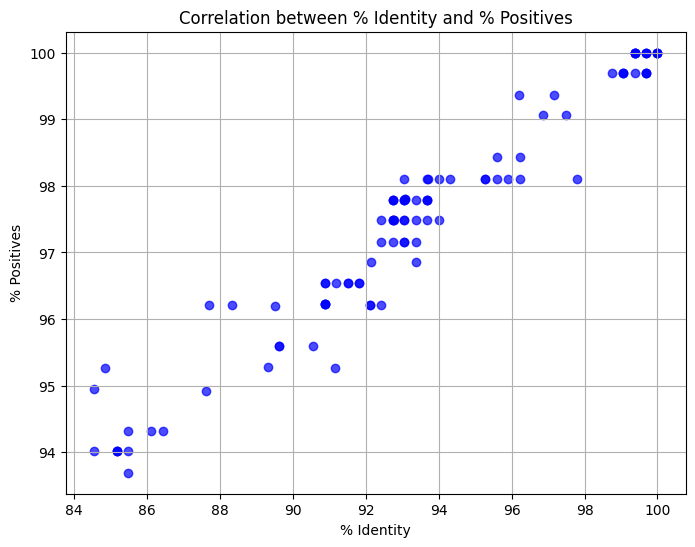

In [35]:
import matplotlib.pyplot as plt

df['% identity'] = pd.to_numeric(df['% identity'], errors='coerce')
df['% positives'] = pd.to_numeric(df['% positives'], errors='coerce')

plt.figure(figsize=(8, 6))
plt.scatter(df['% identity'], df['% positives'], color='blue', alpha=0.7)
plt.title('Correlation between % Identity and % Positives')
plt.xlabel('% Identity')
plt.ylabel('% Positives')
plt.grid(True)
plt.show()

### Question  5
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [40]:
protein_source = pd.read_csv('https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv')
protein_source.set_index('Protein', inplace=True)
df['Protein source'] = protein_source['Source']
df

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications,Unnamed: 0,Source,Protein source
0,100.000,318,0,0,1,318,1,318,0,629,100.00,1487,9.0,0.0,RefSeq,NaN
1,99.686,318,1,0,1,318,1,318,0,629,100.00,17947,47.0,NaN,NaN,NaN
2,99.686,318,1,0,1,318,1,318,0,627,100.00,12106,13.0,2.0,GenPept,NaN
3,99.686,318,1,0,1,318,1,318,0,627,99.69,2319,41.0,NaN,NaN,NaN
4,99.371,318,2,0,1,318,1,318,0,627,100.00,18964,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,92.767,318,23,0,1,318,1,318,0,551,97.48,17348,6.0,NaN,NaN,NaN
96,93.375,317,21,0,1,317,1,317,0,551,96.85,7105,19.0,NaN,NaN,NaN
97,84.543,317,49,0,1,317,1,317,0,551,94.01,18940,37.0,97.0,GenPept,NaN
98,85.174,317,47,0,1,317,1,317,0,551,94.01,18762,5.0,98.0,GenPept,NaN
